In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Import package

In [3]:
#Modules for EDA
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

#Modules for ML(Recommendation)
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

In [39]:
df = pd.read_csv('top100_kdrama.csv')
df.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1


In [40]:
synopsis = df['Synopsis']
synopsis.head()

0    Geu Roo is a young autistic man. He works for ...
1    The stories of people going through their days...
2    Although Baek Hee Sung is hiding a dark secret...
3    Everyday is extraordinary for five doctors and...
4    Park Dong Hoon is a middle-aged engineer who i...
Name: Synopsis, dtype: object

## Buat variabel terpisah khusus untuk data judul film

In [41]:
kdrama_names = df[['Name']]
kdrama_names.head()

,Name
0,Move to Heaven
1,Hospital Playlist
2,Flower of Evil
3,Hospital Playlist 2
4,My Mister


## seleksi fitur yang digunakan untuk Rekomendasi

In [42]:
cols_for_recommend = ['Year of release', 'Number of Episode', 'Network', 'Duration', 'Content Rating', 'Rating']
df = df[cols_for_recommend]
df.head(10)

,Year of release,Number of Episode,Network,Duration,Content Rating,Rating
0,2021,10,Netflix,52 min.,18+ Restricted (violence & profanity),9.2
1,2020,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,9.1
2,2020,16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,9.1
3,2021,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,9.1
4,2018,16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,9.1
5,2017,16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,9.1
6,2015,20,tvN,1 hr. 40 min.,15+ - Teens 15 or older,9.0
7,2020,16,"Netflix, tvN",1 hr. 15 min.,15+ - Teens 15 or older,9.0
8,2020,20,tvN,1 hr. 20 min.,15+ - Teens 15 or older,9.0
9,2018,16,tvN,1 hr. 3 min.,15+ - Teens 15 or older,9.0


## Feature Engineering

## Menghapus nilai Duplikat di kolom Network

In [45]:
networks = []
[networks.append(list(set(network.replace(' ','').split(',')))[0]) for network in df['Network']]

In [46]:
df['Network'] = networks
df['Network'].unique()

array(['Netflix', 'tvN', 'jTBC', 'KBS2', 'OCN', 'SBS', 'MBC'],
      dtype=object)

## Network dan Total KDramas

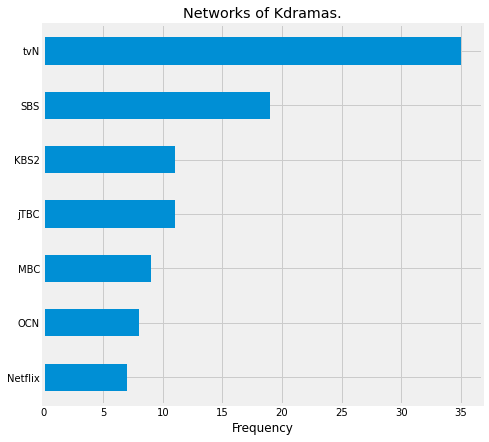

tvN        35
SBS        19
KBS2       11
jTBC       11
MBC         9
OCN         8
Netflix     7
Name: Network, dtype: int64

In [47]:
plt.figure(figsize=(7,7))

df['Network'].value_counts().plot(kind='barh')

plt.gca().invert_yaxis()
plt.title("Networks of Kdramas.")
plt.xlabel('Frequency')
plt.show()

df['Network'].value_counts()

## Mengelompokkan  OCN dan ViKi ke kategori 'others' karena jumlah yang  sedikit

In [48]:
df['Network'].replace(['OCN','Viki'],['Others','Others'],inplace=True)

In [49]:
df['Duration'] = df['Duration'].str.replace('[A-Za-z]\D+','',regex=True)
df['Duration'].head()

0      52 
1    1 30 
2    1 10 
3    1 40 
4    1 17 
Name: Duration, dtype: object

In [50]:
df['Duration'] = df['Duration'].str.replace(' ','',regex=True)
df['Duration'] = pd.to_numeric(df['Duration'])
df['Duration'].head()

0     52
1    130
2    110
3    140
4    117
Name: Duration, dtype: int64

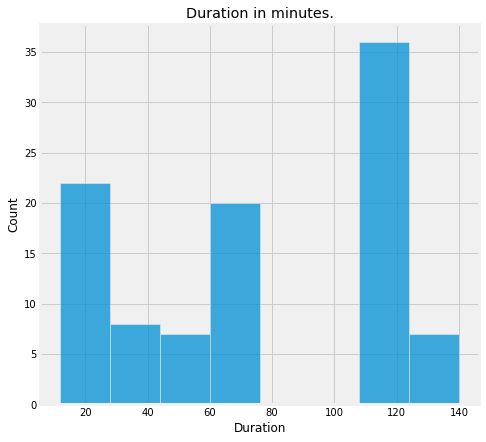

In [51]:
plt.figure(figsize=(7,7))
sns.histplot(data=df['Duration'])
plt.title('Duration in minutes.')
plt.show()

## Content Rating

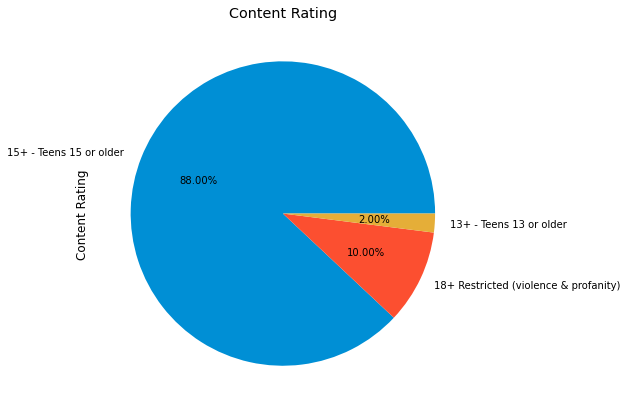

In [52]:
plt.figure(figsize=(7,7))
df['Content Rating'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title("Content Rating")
plt.show()

In [53]:
df['Content Rating'].value_counts()

15+ - Teens 15 or older                   88
18+ Restricted (violence & profanity)     10
13+ - Teens 13 or older                    2
Name: Content Rating, dtype: int64

# Rating dan Content Rating

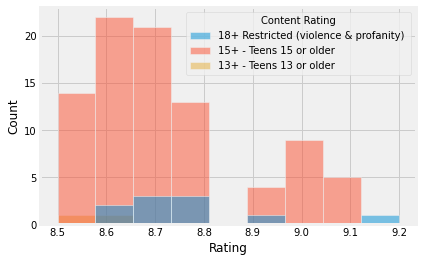

In [54]:
sns.histplot(data=df[['Rating','Content Rating']],x='Rating',hue='Content Rating')
plt.show()

In [55]:
df[['Rating']].describe()

,Rating
count,100.000000
mean,8.723000
std,0.174573
min,8.500000
25%,8.600000
50%,8.700000
75%,8.800000
max,9.200000


## One Hot Encoding

In [56]:
cols_to_encode = ['Network','Content Rating']
dummies = pd.get_dummies(df[cols_to_encode],drop_first=True)
dummies.head()

,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,1,1,0
3,0,0,0,0,0,1,1,0
4,0,0,0,0,0,1,1,0


In [57]:
df

,Year of release,Number of Episode,Network,Duration,Content Rating,Rating
0,2021,10,Netflix,52,18+ Restricted (violence & profanity),9.2
1,2020,12,tvN,130,15+ - Teens 15 or older,9.1
2,2020,16,tvN,110,15+ - Teens 15 or older,9.1
3,2021,12,tvN,140,15+ - Teens 15 or older,9.1
4,2018,16,tvN,117,15+ - Teens 15 or older,9.1
...,...,...,...,...,...,...
95,2019,16,SBS,110,15+ - Teens 15 or older,8.5
96,2019,32,SBS,35,15+ - Teens 15 or older,8.5
97,2019,40,KBS2,35,15+ - Teens 15 or older,8.5
98,2017,16,tvN,110,15+ - Teens 15 or older,8.5


In [58]:
dummies.columns

Index(['Network_MBC', 'Network_Netflix', 'Network_Others', 'Network_SBS',
       'Network_jTBC', 'Network_tvN',
       'Content Rating_15+ - Teens 15 or older ',
       'Content Rating_18+ Restricted (violence & profanity) '],
      dtype='object')

In [59]:
df.drop(cols_to_encode, axis=1,inplace=True)
df.head()

,Year of release,Number of Episode,Duration,Rating
0,2021,10,52,9.2
1,2020,12,130,9.1
2,2020,16,110,9.1
3,2021,12,140,9.1
4,2018,16,117,9.1


## Feature Scaling

In [60]:
scale = MinMaxScaler()
scalled = scale.fit_transform(df)

In [61]:
i=0
for col in df.columns:
    df[col] = scalled[:,i]
    i += 1

In [28]:
df.head()

,Year of release,Number of Episode,Duration,Rating
0,1.000000,0.042553,0.312500,1.000000
1,0.944444,0.063830,0.921875,0.857143
2,0.944444,0.106383,0.765625,0.857143
3,1.000000,0.063830,1.000000,0.857143
4,0.833333,0.106383,0.820312,0.857143


In [62]:
new_df = pd.concat([df, dummies],axis=1)
new_df

,Year of release,Number of Episode,Duration,Rating,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
0,1.000000,0.042553,0.312500,1.000000,0,1,0,0,0,0,0,1
1,0.944444,0.063830,0.921875,0.857143,0,0,0,0,0,1,1,0
2,0.944444,0.106383,0.765625,0.857143,0,0,0,0,0,1,1,0
3,1.000000,0.063830,1.000000,0.857143,0,0,0,0,0,1,1,0
4,0.833333,0.106383,0.820312,0.857143,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.888889,0.106383,0.765625,0.000000,0,0,0,1,0,0,1,0
96,0.888889,0.276596,0.179688,0.000000,0,0,0,1,0,0,1,0
97,0.888889,0.361702,0.179688,0.000000,0,0,0,0,0,0,1,0
98,0.777778,0.106383,0.765625,0.000000,0,0,0,0,0,1,1,0


In [30]:
new_df.head()

,Year of release,Number of Episode,Duration,Rating,"Network_KBS2, Netflix",Network_MBC,Network_Netflix,"Network_Netflix, OCN","Network_Netflix, SBS","Network_Netflix, tvN",Network_OCN,Network_SBS,Network_jTBC,"Network_jTBC, Netflix","Network_jTBC, Viki",Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
0,1.000000,0.042553,0.312500,1.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0.944444,0.063830,0.921875,0.857143,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0.944444,0.106383,0.765625,0.857143,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1.000000,0.063830,1.000000,0.857143,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0.833333,0.106383,0.820312,0.857143,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [31]:
kdrama_names['Name'].loc[23]='kingdom'

In [63]:
new_df.index = [drama for drama in kdrama_names['Name']]
synopsis.index = [drama for drama in kdrama_names['Name']]

In [117]:
synopsis

Move to Heaven                   Geu Roo is a young autistic man. He works for ...
Hospital Playlist                The stories of people going through their days...
Flower of Evil                   Although Baek Hee Sung is hiding a dark secret...
Hospital Playlist 2              Everyday is extraordinary for five doctors and...
My Mister                        Park Dong Hoon is a middle-aged engineer who i...
                                                       ...                        
Vagabond                         Cha Dal Gun becomes an awakened tiger in the f...
Doctor John                      “Doctor John” is a medical drama about doctors...
When the Camellia Blooms         Dong Baek is a single mother living in the sma...
Because This Is My First Life    A house-poor man and homeless woman become hou...
Fight For My Way                 Can you still go after your dreams without the...
Name: Synopsis, Length: 100, dtype: object

In [65]:
new_df.head()

,Year of release,Number of Episode,Duration,Rating,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
Move to Heaven,1.000000,0.042553,0.312500,1.000000,0,1,0,0,0,0,0,1
Hospital Playlist,0.944444,0.063830,0.921875,0.857143,0,0,0,0,0,1,1,0
Flower of Evil,0.944444,0.106383,0.765625,0.857143,0,0,0,0,0,1,1,0
Hospital Playlist 2,1.000000,0.063830,1.000000,0.857143,0,0,0,0,0,1,1,0
My Mister,0.833333,0.106383,0.820312,0.857143,0,0,0,0,0,1,1,0


In [66]:
def getRecommendation_dramas_for(drama_name,no_of_recommend=5,get_similarity_rate=False):
    
    kn = NearestNeighbors(n_neighbors=no_of_recommend+1,metric='manhattan')
    kn.fit(new_df)
    
    distances, indices = kn.kneighbors(new_df.loc[drama_name])
    
    print(f'Similar K-Dramas for "{drama_name[0]}":')
    nearest_dramas = [kdrama_names.loc[i][0] for i in indices.flatten()][1:]
    if not get_similarity_rate:
        return nearest_dramas
    sim_rates = []
    synopsis_ = []
    for drama in nearest_dramas:
        synopsis_.append(synopsis.loc[drama][0])
        sim = cosine_similarity(new_df.loc[drama_name],[new_df.loc[drama]]).flatten()
        sim_rates.append(sim[0])
    recommended_dramas = pd.DataFrame({'Recommended Drama':nearest_dramas,'Similarity':sim_rates,'Synopsis':synopsis_})
    recommended_dramas.sort_values(by='Similarity',ascending=True)
    return recommended_dramas

## Prediksi Rekomendasi Drama 

In [67]:
rd1 = kdrama_names.loc[14]
rd1

Name    Crash Landing on You
Name: 14, dtype: object

In [68]:
getRecommendation_dramas_for(rd1,no_of_recommend=5)

Similar K-Dramas for "Crash Landing on You":


["It's Okay to Not Be Okay", 'Mr. Queen', 'Vincenzo', 'Signal', 'My Mister']